In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [ ]:
df = pd.read_csv("salary.csv")
df.head()


,ID,education_level,years_experience,job_title,industry,location,company_size,certifications,age,working_hours,crucial_code,salary
0,1,High School,12.0,Data Scientist,Education,New York,Medium,1.0,48.0,52.0,XEV156,NaN
1,2,PhD,17.0,Data Scientist,IT,New York,NaN,0.0,39.0,34.0,NaN,NaN
2,3,PhD,12.0,Software Engineer,Education,New York,Large,4.0,NaN,42.0,FIK684,95136.09799
3,4,Bachelors,1.0,Analyst,Healthcare,New York,Small,2.0,34.0,NaN,DKD155,70682.30628
4,5,High School,0.0,Analyst,IT,New York,Small,1.0,38.0,40.0,ZZH645,64887.65469


In [3]:
df.shape

(11000, 12)

In [4]:
df = df.drop(["ID", "crucial_code"],axis=1)

In [5]:
df =df[df.isnull().sum(axis=1) <= 2]

In [6]:
df.shape

(10902, 10)

<Axes: ylabel='salary'>

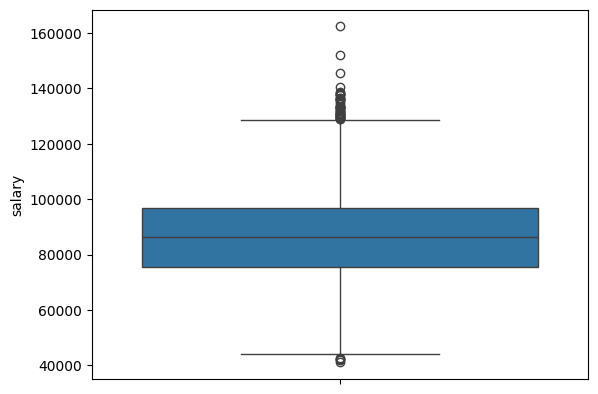

In [ ]:
import seaborn as sns
sns.boxplot(df['salary'])  


In [8]:
df = df[df['salary'] < df['salary'].quantile(0.99)]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10290 entries, 2 to 10999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   education_level   9780 non-null   object 
 1   years_experience  9797 non-null   float64
 2   job_title         9800 non-null   object 
 3   industry          9800 non-null   object 
 4   location          10290 non-null  object 
 5   company_size      9804 non-null   object 
 6   certifications    9801 non-null   float64
 7   age               9795 non-null   float64
 8   working_hours     9802 non-null   float64
 9   salary            10290 non-null  float64
dtypes: float64(5), object(5)
memory usage: 884.3+ KB


In [10]:



df = df.drop_duplicates(keep="first")
df.shape

(10288, 10)

In [11]:
df.columns

Index(['education_level', 'years_experience', 'job_title', 'industry',
       'location', 'company_size', 'certifications', 'age', 'working_hours',
       'salary'],
      dtype='object')

In [12]:
df.sample()

,education_level,years_experience,job_title,industry,location,company_size,certifications,age,working_hours,salary
6562,Bachelors,16.0,Software Engineer,Healthcare,London,Medium,4.0,51.0,NaN,84553.66296


In [13]:
df.describe()

,years_experience,certifications,age,working_hours,salary
count,9795.000000,9799.000000,9793.000000,9800.000000,10288.000000
mean,9.540378,1.979794,40.692433,44.510204,85958.867517
std,5.755153,1.412047,10.998615,8.635023,14722.383842
min,0.000000,0.000000,22.000000,30.000000,41036.552490
25%,5.000000,1.000000,31.000000,37.000000,75387.458060
50%,10.000000,2.000000,41.000000,44.000000,86097.653025
75%,15.000000,3.000000,50.000000,52.000000,96507.903135
max,19.000000,4.000000,59.000000,59.000000,122416.732900


In [15]:
df.columns

Index(['education_level', 'years_experience', 'job_title', 'industry',
       'location', 'company_size', 'certifications', 'age', 'working_hours',
       'salary'],
      dtype='object')

In [16]:
df['salary'] = df['salary'].fillna(df['salary'].median())
         

In [17]:
df.sample(5)

,education_level,years_experience,job_title,industry,location,company_size,certifications,age,working_hours,salary
1056,Masters,17.0,Software Engineer,Finance,London,Large,0.0,32.0,41.0,88281.35897
9832,Bachelors,11.0,NaN,Healthcare,San Francisco,Small,1.0,49.0,56.0,83508.06279
6448,Bachelors,5.0,Analyst,IT,New York,Medium,2.0,39.0,31.0,61582.71543
8312,PhD,1.0,Data Scientist,Finance,Bangalore,Large,0.0,39.0,58.0,84897.55390
3615,High School,5.0,Manager,Finance,San Francisco,Small,NaN,59.0,45.0,91232.28303


In [18]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
df.tail()

,years_experience,certifications,age,working_hours,salary,education_level_High School,education_level_Masters,education_level_PhD,job_title_Data Scientist,job_title_Manager,job_title_Software Engineer,industry_Finance,industry_Healthcare,industry_IT,location_London,location_New York,location_San Francisco,company_size_Medium,company_size_Small
10994,NaN,3.0,45.0,43.0,60689.22500,False,False,False,False,False,True,False,False,True,False,True,False,True,False
10996,4.0,1.0,30.0,58.0,68231.00794,False,False,True,False,False,False,True,False,False,False,False,False,False,True
10997,12.0,0.0,31.0,52.0,96753.22060,False,False,False,True,False,False,True,False,False,False,False,True,True,False
10998,3.0,2.0,50.0,32.0,98773.40580,False,True,False,False,True,False,False,True,False,False,False,True,False,False
10999,7.0,2.0,28.0,37.0,68906.12689,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [20]:
X = df.drop("salary",axis=1)
y = df["salary"]

In [21]:
X.head()

,years_experience,certifications,age,working_hours,education_level_High School,education_level_Masters,education_level_PhD,job_title_Data Scientist,job_title_Manager,job_title_Software Engineer,industry_Finance,industry_Healthcare,industry_IT,location_London,location_New York,location_San Francisco,company_size_Medium,company_size_Small
2,12.0,4.0,NaN,42.0,False,False,True,False,False,True,False,False,False,False,True,False,False,False
3,1.0,2.0,34.0,NaN,False,False,False,False,False,False,False,True,False,False,True,False,False,True
4,0.0,1.0,38.0,40.0,True,False,False,False,False,False,False,False,True,False,True,False,False,True
5,17.0,3.0,35.0,37.0,False,False,True,False,True,False,False,True,False,False,True,False,False,False
6,6.0,2.0,40.0,43.0,True,False,False,False,False,True,False,False,True,False,True,False,True,False


In [22]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=1)

In [24]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor(random_state=42)
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

grid = GridSearchCV(xgb, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)



,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200], 'subsample': [0.8, 1]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [26]:
grid.score(X_train,y_train)

0.7273561101847024

In [29]:
Y_pred = grid.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
mse = mean_squared_error(y_test,Y_pred)
mae = median_absolute_error(y_test,Y_pred)
r2 = r2_score(y_test,Y_pred)
r2 = r2_score(y_test,Y_pred)
print("MSE :",{mse}, "MAE :", {mae})
print(r2)

MSE : {62354419.476018056} MAE : {5230.766892499996}
0.7031662663011036


In [34]:
import joblib
joblib.dump(grid, "model.pkl")


['model.pkl']

In [35]:
import joblib
joblib.dump(X.columns.tolist(), 'features.pkl')


['features.pkl']